# Setup et imports

In [1]:
import sys
sys.path.append('../src')  # Ajoute le dossier src au path
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from config import DB_PARAMS, logger

# Connexion à la base de données

In [2]:
# Connexion DB via SQLAlchemy
DB_URL = f"postgresql://{DB_PARAMS['user']}:{DB_PARAMS['password']}@{DB_PARAMS['host']}/{DB_PARAMS['dbname']}"
engine = create_engine(DB_URL)
logger.info("Environnement prêt et connecté à la base de données.")

2025-11-09 04:31:45 - INFO - Environnement prêt et connecté à la base de données.


# Chargement des Données

In [3]:
# Charger les animes (Vue 1)
df_anime = pd.read_sql("SELECT * FROM view_anime_basic", engine)
logger.info(f"📚 Animes chargés : {df_anime.shape[0]} lignes, {df_anime.shape[1]} colonnes")

# Convertir en types "nullable"
df_anime['score'] = df_anime['score'].astype('Int64')
df_anime['episodes'] = df_anime['episodes'].astype('Int64')
df_anime['start_year'] = df_anime['start_year'].astype('Int64')

# Charger les genres (Vue 2)
df_genres = pd.read_sql("SELECT * FROM view_anime_genres", engine)
logger.info(f"🏷️ Genres chargés : {df_genres.shape[0]} lignes")

2025-11-09 04:31:45 - INFO - 📚 Animes chargés : 2000 lignes, 8 colonnes
2025-11-09 04:31:45 - INFO - 🏷️ Genres chargés : 7097 lignes


# Audit Rapide (Data Quality)

In [4]:
# Afficher les premières lignes pour vérifier
display(df_anime.head(3))

# Vérifier les types de données et les valeurs manquantes
print("\n--- Infos Dataframe Anime ---")
df_anime.info()

# Vérifier s'il y a des doublons d'ID (ne devrait pas arriver avec notre ELT, mais on vérifie)
doublons = df_anime['anime_id'].duplicated().sum()
print(f"\nNombre de doublons d'ID : {doublons}")

,anime_id,title,score,episodes,format,status,start_year,fetched_at
0,21746,FLCL Progressive,61,6,TV,FINISHED,2018,2025-11-09 03:16:56.530384
1,87494,Hitorijime My Hero,69,12,TV,FINISHED,2017,2025-11-09 03:16:56.530384
2,108577,Sora no Aosa wo Shiru Hito yo,73,1,MOVIE,FINISHED,2019,2025-11-09 03:16:56.530384



--- Infos Dataframe Anime ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   anime_id    2000 non-null   int64         
 1   title       2000 non-null   object        
 2   score       1991 non-null   Int64         
 3   episodes    1990 non-null   Int64         
 4   format      2000 non-null   object        
 5   status      2000 non-null   object        
 6   start_year  1996 non-null   Int64         
 7   fetched_at  2000 non-null   datetime64[ns]
dtypes: Int64(3), datetime64[ns](1), int64(1), object(3)
memory usage: 131.0+ KB

Nombre de doublons d'ID : 0


# Première Analyse - Distribution des Scores

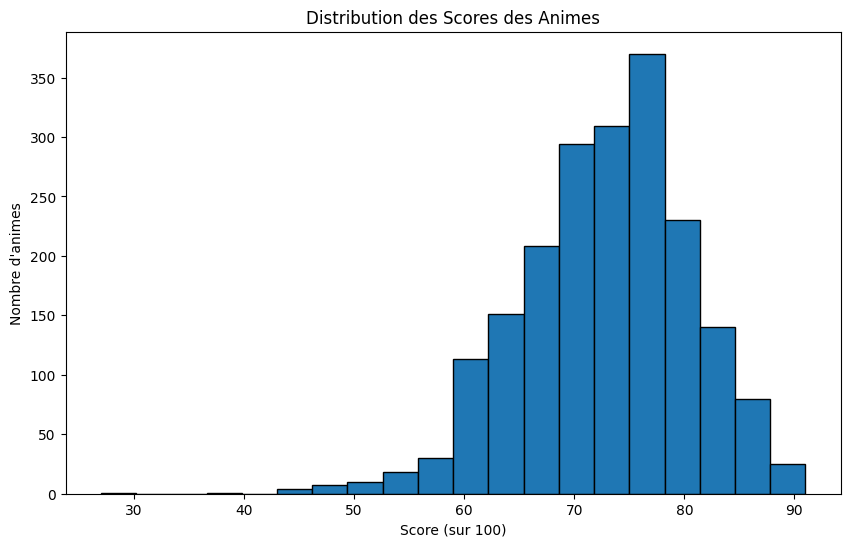

In [5]:
# Histogramme des scores
plt.figure(figsize=(10, 6))
# On enlève les NaN pour le graphique
df_anime['score'].dropna().hist(bins=20, edgecolor='black')
plt.title('Distribution des Scores des Animes')
plt.xlabel('Score (sur 100)')
plt.ylabel("Nombre d'animes")
plt.grid(False) # Pour un look plus propre parfois
plt.show()

# Top 10 des Genres les plus populaires

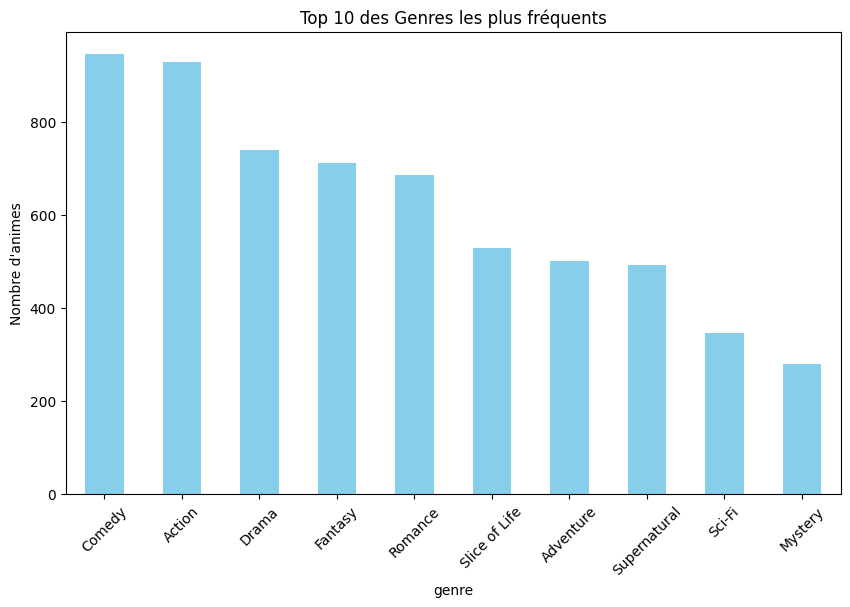

In [6]:
# Compter le nombre d'occurrences de chaque genre
top_genres = df_genres['genre'].value_counts().head(10)

# Graphique en barres
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 des Genres les plus fréquents')
plt.ylabel("Nombre d'animes")
plt.xticks(rotation=45)
plt.show()